In [187]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot, inv, eig
from numpy.random import randn
from IPython.display import display, Latex

This notebooks implements code meant to reproduce what's explained in [A geometric interpretation of the covariance matrix](https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/).

It's easy enough to generate points with covariance matrix
$$ \Sigma = I = 
\begin{bmatrix}
1 & 0 \\
0 & 1\end{bmatrix}$$

Text(0, 0.5, 'y')

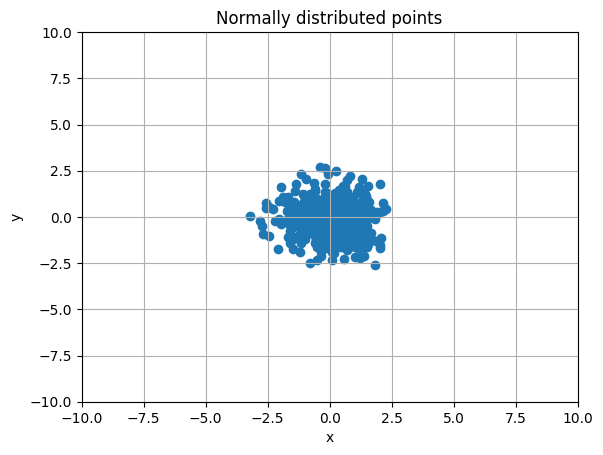

In [188]:
num_points = 400
# Normally distributed array
D = randn(2,num_points)
plt.figure('Normal')
plt.scatter(D[0],D[1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()
plt.title('Normally distributed points')
plt.xlabel('x')
plt.ylabel('y')

In [189]:
cov_D = np.round(np.cov(D[0],D[1]),2)
latex = f"$$\hat{{I}} = \\begin{{bmatrix}} {cov_D[0,0]} & {cov_D[0,1]} \\\ {cov_D[0,1]} & {cov_D[1,1]}\\end{{bmatrix}}$$"
display(Latex(latex))

<IPython.core.display.Latex object>

Given a covariance matrix, e.g.
$$\Sigma =
\begin{bmatrix}
4.25 & 3.10 \\
3.10 & 4.29\end{bmatrix}$$

We can treat the problem of generating points distributed according to $\Sigma$ as the problem of mapping a set of points distributed according to $I$, that is, normally-distributed and uncorrelated onto a set of points distributed according to $\Sigma$

Since matrix multiplication is a linear transform, this becomes:
$$D' = T D$$
Where $D'$ contains points distributed according to $\Sigma$ and $T$ is the matrix which does the mapping. This interpretation is not entirely fitting and will be corected later in the text, but for now will be assumed to be true.

We can further expand $T$ into
$$T = R S$$
Where R is a rotation matrix and S is a scaling matrix. We know from linear transforms that a scaling matrix is always diagonal and a rotation matrix is always unitary.

Yet, through eigen decomposition we have that
$$\Sigma = VLV^{-1}$$
Where $L$ is a diagonal matrix with $\Sigma$'s eigenvalues and $V$ is a matrix composed of its eigenvectors.
Since $L$ is diagonal, its square root is easily computable, and can be name $R$. Thus, we have
$$\Sigma = VSSV^{-1}$$

Interpreting $S$ as a scaling operation and assuming $V$ behaves like a rotation matrix, which is also unitary. We have
$$\Sigma = VSSV^{-1}$$
$$\Sigma = RSSR^{-1}$$
$$\Sigma = TT^{-1}$$
$$\Sigma = TT^{H}$$
The last equation also indicates that for $\Sigma$ to be valid, it must be positive definite. Finally, we can apply this math to transform our data

In [190]:
Sigma = np.array([[4.25, 3.10],
                  [3.10, 4.29]])
# eigen decomposition
eigenvalues, eigenvectors = eig(Sigma)
R = eigenvectors
L = np.diag(eigenvalues)
S = np.sqrt(L)

Text(0, 0.5, 'y')

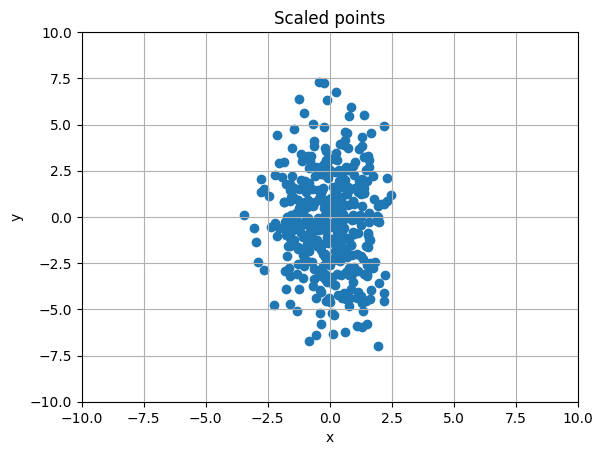

In [191]:
D_scaled = np.dot(S,D)
plt.figure('Scaled')
plt.scatter(D_scaled[0],D_scaled[1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()
plt.title('Scaled points')
plt.xlabel('x')
plt.ylabel('y')

The data is now distributed according to the diagonal matrix L. for the given $\Sigma$,
$$L =
\begin{bmatrix}
1.17 & 0.00 \\
0.00 & 7.37\end{bmatrix}$$

In [192]:
cov_D_scaled = np.round(np.cov(D_scaled[0],D_scaled[1]),2)
latex = f"$$\hat{{L}} = \\begin{{bmatrix}} {cov_D_scaled[0,0]} & {cov_D_scaled[0,1]} \\\ {cov_D_scaled[0,1]} & {cov_D_scaled[1,1]}\\end{{bmatrix}}$$"
display(Latex(latex))

<IPython.core.display.Latex object>

Now we should rotate our data. The article gives the impression that
$$D' = RSD = TD$$
However, while $\Sigma = TT^{H}$ is a valid factorization for $\Sigma$, the operator we want should come from the factorization $\Sigma = \Sigma^\frac{1}{2}\Sigma^\frac{1}{2}$, such that
$$D' = \Sigma^\frac{1}{2}D$$
This may seem confusing at first, but is similar to the idea that when changing the variance $\sigma^2$ of a 1-d random variable, its area within a certain interval is scaled by $\sigma = (\sigma^2)^\frac{1}{2}$.
Through eigendecomposition, we have that 
$$\Sigma^x = VL^xV^{-1}$$
Since we've determined $S = L^\frac{1}{2}$, we find $\Sigma^\frac{1}{2}$ through
$$\Sigma^\frac{1}{2} = VSV^{-1}$$

Text(0, 0.5, 'y')

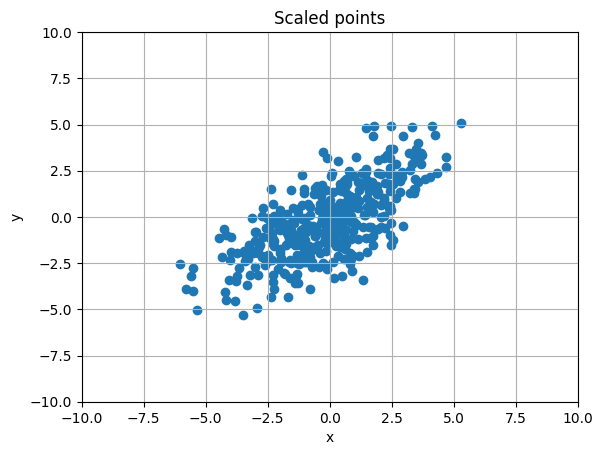

In [193]:
Sigma_sqrt = multi_dot([R,S,inv(R)])
# rs is short for rotated and scaled
D_rs = np.dot(Sigma_sqrt,D)
plt.figure('Scaled')
plt.scatter(D_rs[0],D_rs[1])
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.grid()
plt.title('Scaled points')
plt.xlabel('x')
plt.ylabel('y')

Now our data should have $$\Sigma =
\begin{bmatrix}
4.25 & 3.10 \\
3.10 & 4.29\end{bmatrix}$$

In [194]:
cov_D_rs= np.round(np.cov(D_rs[0],D_rs[1]),2)
latex = f"$$\hat{{\Sigma}} = \\begin{{bmatrix}} {cov_D_rs[0,0]} & {cov_D_rs[0,1]} \\\ {cov_D_rs[0,1]} & {cov_D_rs[1,1]}\\end{{bmatrix}}$$"
display(Latex(latex))

<IPython.core.display.Latex object>